In [2]:
#Librería de graficación
import matplotlib.pyplot as plt
import matplotlib as mp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.gridspec as gsa
import matplotlib.ticker as mticker
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot, transforms



#Librerías de procesamiento matemático y lectura de archivos
import numpy as np
import netCDF4 as nc
import pandas as pd
import glob
import os
from scipy import signal

#Librería de estadística
import scipy as sp
from scipy.stats import pearsonr,spearmanr

#librería para manejo de fechas
from datetime import datetime,timedelta

plt.style.use("seaborn")
mp.rcParams['xtick.labelsize']=15
mp.rcParams['ytick.labelsize']=15

mp.rcParams['axes.labelsize']=17

# Primera parte

# Segunda Parte

In [3]:
def reading_netcdf(ruta):
    data=nc.Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    data_variables=[np.array(data[i][:]) for i in list(data.variables.keys())]
    return data_variables

In [4]:
rutas = np.sort(glob.glob("/home/franklin/Documentos/GitHub/TDG/Dataset/CMEMS_ECMFW/*.nc"))

#Al estar por años se debe concatenar
for i in range(0,len(rutas)):
    if i==0:
        [adt,time,lat,lon,ugos,vgos,vgosa,sla,ugosa]=reading_netcdf(rutas[i])
    else:
        [adt,time2,lat,lon,ugos,vgos,vgosa,sla2,ugosa]=reading_netcdf(rutas[i])
        sla=np.concatenate((sla,sla2))
        time=np.concatenate((time,time2))

adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (366, 45, 185) m
time (366,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (366, 45, 185) m/s
vgos (366, 45, 185) m/s
vgosa (366, 45, 185) m/s
sla (366, 45, 185) m
ugosa (366, 45, 185) m/s


adt (367, 45, 185) m
time (367,) days since 1950-01-01 00:00:00
latitude (45,) degrees_north
longitude (185,) degrees_east
ugos (367, 45, 185) m/s
vgos (367, 45, 185) m/s
vgosa (367, 45, 185) m/s
sla (367, 45, 185) m
ugosa (367, 45, 185) m/s


adt (366, 45, 185) m
tim

Resolución diaria

In [48]:
sla[sla<=-1000]=np.nan
da=[datetime(1950,1,1,0,0,0)+timedelta(days=int(time[w])) for w in range (0,len(time))]
date=pd.DatetimeIndex(da)
new_array = np.array(date.to_pydatetime(), dtype=object)
sla_copy=sla

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


Se hace un suavizado 1 año, para eiminar la variabilidad mensual, estacional y semianual

In [6]:
for la in range (sla_copy.shape[1]):
    for lo in range(sla_copy.shape[2]):
        a=sla_copy[:,la,lo]
        serie_test=pd.Series(a,index=date)
        serie_rolling=serie_test.rolling(365).mean()
        sla_copy[:,la,lo]=serie_rolling.values

In [7]:
sla_copy[365:,:,:]

array([[[0.06157589, 0.06107589, 0.06039644, ...,        nan,
                nan,        nan],
        [0.06117562, 0.06079534, 0.06016027, ...,        nan,
                nan,        nan],
        [0.06108274, 0.06072384, 0.06001178, ...,        nan,
                nan,        nan],
        ...,
        [0.06390603, 0.06277753, 0.06173315, ...,        nan,
                nan,        nan],
        [0.06216685, 0.06120712, 0.06038384, ...,        nan,
                nan,        nan],
        [0.06056904, 0.05999945, 0.05952822, ...,        nan,
                nan,        nan]],

       [[0.06131808, 0.06081041, 0.06012712, ...,        nan,
                nan,        nan],
        [0.06091178, 0.06052274, 0.05988301, ...,        nan,
                nan,        nan],
        [0.06081726, 0.06044932, 0.05973123, ...,        nan,
                nan,        nan],
        ...,
        [0.06359836, 0.06246712, 0.0614189 , ...,        nan,
                nan,        nan],
        [0.0

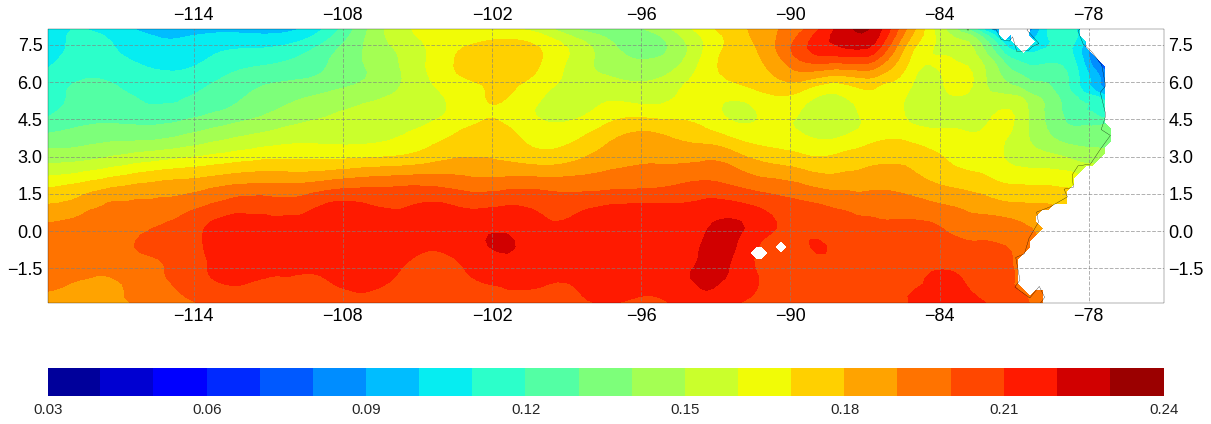

In [8]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,sla_copy[2000,:,:],20,transform=ccrs.PlateCarree(),cmap="jet")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()

## Formando la matriz A

In [9]:
sla_copy.shape

(9289, 45, 185)

In [10]:
A=np.reshape(sla_copy[365:,:,:],(len(time)-365,len(lon)*len(lat)))

In [11]:
A.shape

(8924, 8325)

In [12]:
fila1_A = np.array(A[0,:])

In [13]:
fila1_A

array([0.06157589, 0.06107589, 0.06039644, ...,        nan,        nan,
              nan])

In [14]:
#Se hallan los índices de las posiciones que son tierra (NaN)
pos_cont = np.isnan(fila1_A)
pos_mar  = (np.where(pos_cont == False))[0]

#Se seleccionan solo las posiciones asociadas al mar
A_no_land = A[:, pos_mar]
print (np.shape(A))
print (np.shape(A_no_land))

(8924, 8325)
(8924, 7444)


Se escala la matriz de A_no_land para que queden correlaciones y no covarianzas

In [15]:
A_corr=np.copy(A_no_land)
for i in range(A_no_land.shape[1]):
    A_corr[:,i]=np.std(A_no_land[:,i]-np.mean(A_no_land[:,i]))

In [16]:
A_corr.shape

(8924, 7444)

## Haciendo la EOF

In [17]:
U,S,Vh=np.linalg.svd(A_no_land)

In [18]:
U.shape,S.shape,Vh.shape

((8924, 8924), (7444,), (7444, 7444))

### Modos de oscilación

Text(0, 0.5, 'Porcentaje de varianza')

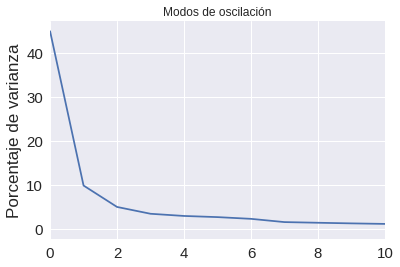

In [19]:
plt.figure()
plt.plot((S/np.sum(S))*100)
plt.xlim(0,10)
plt.title("Modos de oscilación")
plt.ylabel("Porcentaje de varianza")

In [29]:
dataset_oni=pd.read_excel(r"/home/franklin/Documentos/GitHub/TDG/Dataset/oni index.xlsx").set_index("Year")

In [47]:
data=dataset_oni.values.ravel()
fechas=pd.date_range("1950-01-01","2019-01-01",freq="M")
date_oni=[i-timedelta(days=15) for i in fechas]
serie_oni_d=pd.Series(data=data,index=date_oni)

In [38]:
serie_oni_d

1950-01-16   -1.53
1950-02-13   -1.34
1950-03-16   -1.16
1950-04-15   -1.18
1950-05-16   -1.07
              ... 
2018-08-16    0.20
2018-09-15    0.43
2018-10-16    0.70
2018-11-15    0.85
2018-12-16    0.82
Length: 828, dtype: float64

In [46]:
date

[Timestamp('1950-01-16 00:00:00', freq='M'),
 Timestamp('1950-02-13 00:00:00', freq='M'),
 Timestamp('1950-03-16 00:00:00', freq='M'),
 Timestamp('1950-04-15 00:00:00', freq='M'),
 Timestamp('1950-05-16 00:00:00', freq='M'),
 Timestamp('1950-06-15 00:00:00', freq='M'),
 Timestamp('1950-07-16 00:00:00', freq='M'),
 Timestamp('1950-08-16 00:00:00', freq='M'),
 Timestamp('1950-09-15 00:00:00', freq='M'),
 Timestamp('1950-10-16 00:00:00', freq='M'),
 Timestamp('1950-11-15 00:00:00', freq='M'),
 Timestamp('1950-12-16 00:00:00', freq='M'),
 Timestamp('1951-01-16 00:00:00', freq='M'),
 Timestamp('1951-02-13 00:00:00', freq='M'),
 Timestamp('1951-03-16 00:00:00', freq='M'),
 Timestamp('1951-04-15 00:00:00', freq='M'),
 Timestamp('1951-05-16 00:00:00', freq='M'),
 Timestamp('1951-06-15 00:00:00', freq='M'),
 Timestamp('1951-07-16 00:00:00', freq='M'),
 Timestamp('1951-08-16 00:00:00', freq='M'),
 Timestamp('1951-09-15 00:00:00', freq='M'),
 Timestamp('1951-10-16 00:00:00', freq='M'),
 Timestamp

(727929.0, 737192.0)

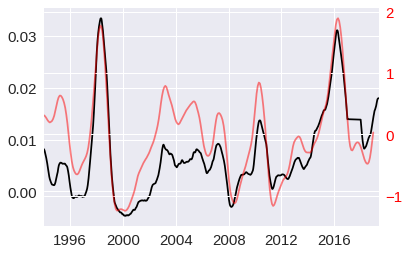

In [63]:
fig,ax=plt.subplots(1,1)
ax.plot(date[365:],U[:,0]*-1,c='k')
ax2 = ax.twinx()
ax2.plot(serie_oni_d.rolling(12).mean()[365:],c='red',alpha=0.5,label="ONI")
ax2.tick_params(axis='y', labelcolor='red')
ax.set_xlim(date[365],date[-1])
# ax2.set_ylim(-6,6)
        

# plt.plot(date[365:],U[:,0]*-1)
# plt.plot(serie_oni_d)


### Pintando la EOF

In [28]:
verify=np.copy(fila1_A)

In [29]:
iters=0
for i in range(len(verify)):
    if np.isnan(verify[i])==True:
        iters=iters
    if np.isnan(verify[i])==False:
        verify[i]==Vh[0,iters]
        iters=iters+1

In [30]:
EOF=verify.reshape([len(lat),len(lon)])

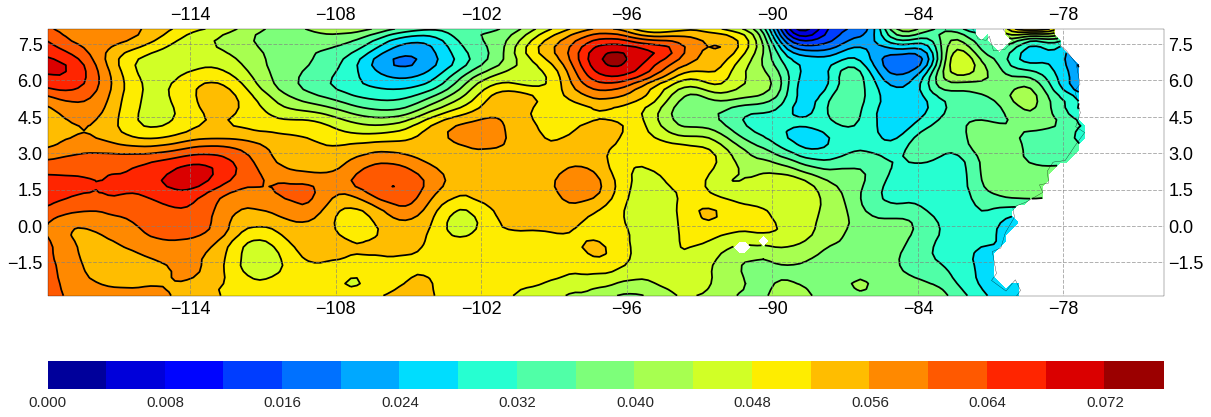

In [67]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,EOF,20,transform=ccrs.PlateCarree(),cmap="jet")
ct=ax.contour(x,y,EOF,20,transform=ccrs.PlateCarree(),colors='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()

In [72]:
# EOF multiplicada por los valores propios
matriz_EOF=np.zeros([len(U[:,0]),len(lat),len(lon)])
for i in range(len(U[:,0])):
    matriz_EOF[i,:,:]=EOF*U[i,0]

In [73]:
matriz_EOF

array([[[-0.00050245, -0.00049837, -0.00049283, ...,         nan,
                 nan,         nan],
        [-0.00049918, -0.00049608, -0.0004909 , ...,         nan,
                 nan,         nan],
        [-0.00049843, -0.0004955 , -0.00048969, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00052146, -0.00051226, -0.00050373, ...,         nan,
                 nan,         nan],
        [-0.00050727, -0.00049944, -0.00049272, ...,         nan,
                 nan,         nan],
        [-0.00049423, -0.00048959, -0.00048574, ...,         nan,
                 nan,         nan]],

       [[-0.00050171, -0.00049763, -0.0004921 , ...,         nan,
                 nan,         nan],
        [-0.00049845, -0.00049535, -0.00049017, ...,         nan,
                 nan,         nan],
        [-0.00049769, -0.00049476, -0.00048896, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00052069, -0.0005115 , -0.00050299, ...,  

In [1]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,matriz_EOF[2000,:,:],20,transform=ccrs.PlateCarree(),cmap="jet")
ct=ax.contour(x,y,matriz_EOF[2000,:,:],20,transform=ccrs.PlateCarree(),colors='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()

NameError: name 'plt' is not defined

## EOF con correlaciones

In [48]:
# EOF con correlaciones
U_corr,S_corr,Vh_corr=np.linalg.svd(A_corr)

In [49]:
U_corr.shape,S_corr.shape,Vh_corr.shape

((8924, 8924), (7444,), (7444, 7444))

### Modos de oscilación de EOF con correlación

Text(0, 0.5, 'Porcentaje de varianza')

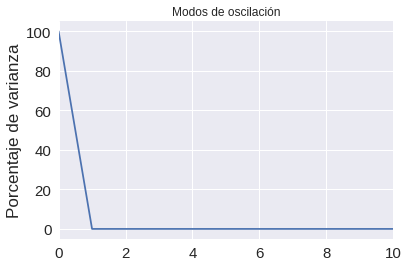

In [50]:
plt.figure()
plt.plot((S_corr/np.sum(S_corr))*100)
plt.xlim(0,10)
plt.title("Modos de oscilación")
plt.ylabel("Porcentaje de varianza")

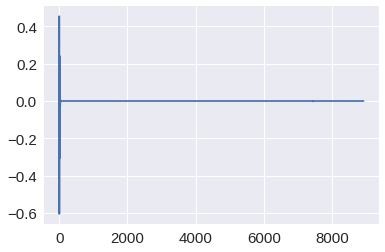

In [51]:
plt.plot(U_corr[0,:])

### Pintando EOF

In [52]:
iters=0
for i in range(len(verify)):
    if np.isnan(verify[i])==True:
        iters=iters
    if np.isnan(verify[i])==False:
        verify[i]==Vh_corr[0,iters]
        iters=iters+1

In [53]:
verify=np.copy(fila1_A)

In [54]:
EOF_corr=verify.reshape([len(lat),len(lon)])

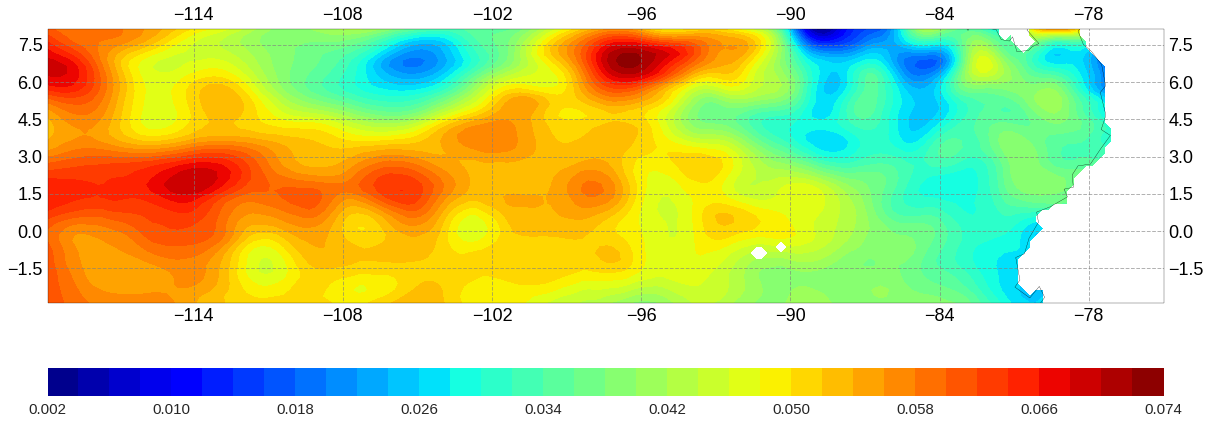

In [55]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
x,y=np.meshgrid(lon,lat)
cf=ax.contourf(x,y,EOF_corr,40,transform=ccrs.PlateCarree(),cmap="jet")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.6, linestyle='--')
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
ax.coastlines()
cbar=plt.colorbar(cf,orientation="horizontal",fraction=0.1, pad=0.06,aspect=40)
cbar.ax.tick_params(labelsize=15) 

plt.show()